# Precipitation variability and change
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [5]:
import xarray as xr, pandas as pd, cmocean

import xlearn

from geoplots import mapplot
from climindex import get_climate_index

%matplotlib notebook

In [2]:
ds = xr.open_mfdataset('/tigress/wenchang/data/gpcp/v2p3/precip.mon.mean.nc').sel(time=slice('1979', '2017'))
gpcp = ds.precip
gpcp_annual = gpcp.resample(time='AS').mean('time').load()

In [3]:
gpcp

<xarray.DataArray 'precip' (time: 468, lat: 72, lon: 144)>
dask.array<shape=(468, 72, 144), dtype=float32, chunksize=(468, 72, 144)>
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 ...
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [   0.  100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [  0.00000000e+00   9.96920997e+36]

<IPython.core.display.Javascript object>


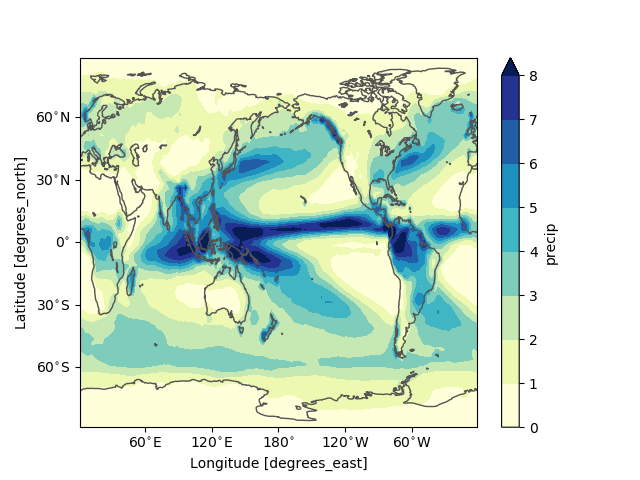

In [6]:
ds.precip.mean('time').plot.contourf(robust=True, levels=10, cmap='YlGnBu')

mapplot()

<IPython.core.display.Javascript object>


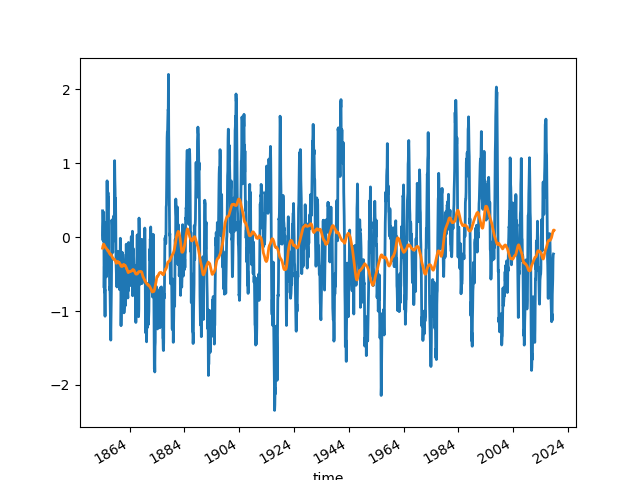

In [23]:
ts = get_climate_index('ipo')
ipo = xr.DataArray(ts, dims=['time'])
ipo.plot()
ipo.rolling(time=108, center=True, min_periods=1).mean().plot()

<IPython.core.display.Javascript object>


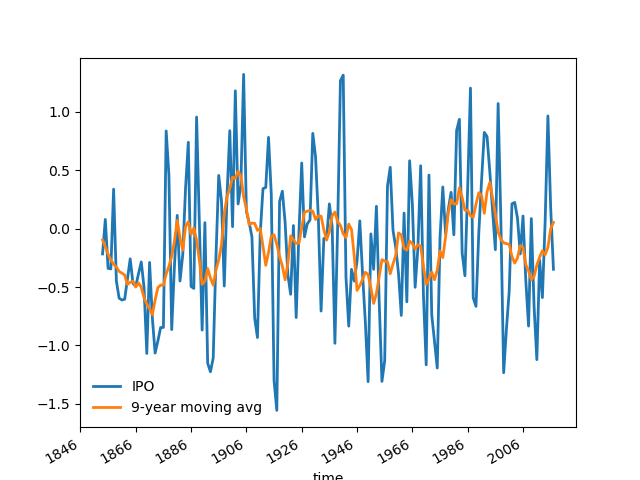

In [29]:
ts = get_climate_index('ipo')
ipo = xr.DataArray(ts, dims=['time']).sel(time=slice(None, '2017'))
ipo.resample(time='AS').mean().plot(label='IPO')
ipo.resample(time='AS').mean().rolling(time=9, center=True, min_periods=1).mean().plot(label='9-year moving avg')

plt.legend()

<IPython.core.display.Javascript object>


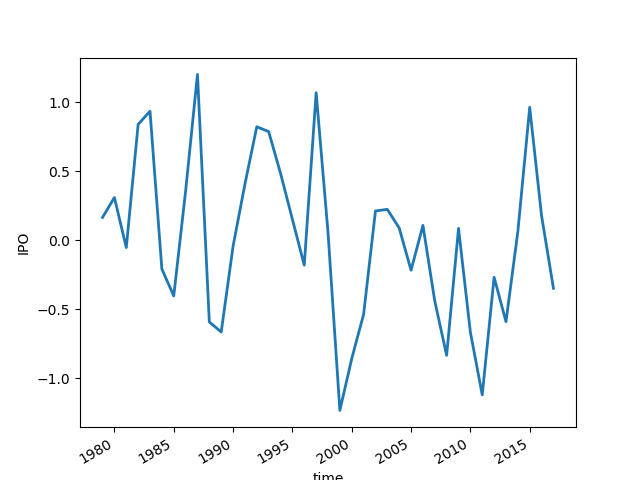

In [8]:
ipo_annual = ipo.resample(time='AS').mean().sel(time=slice('1979', '2017'))
ipo_annual.plot()

In [9]:
da = gpcp.resample(time='AS').mean('time').load()
da

<xarray.DataArray 'precip' (time: 39, lat: 72, lon: 144)>
array([[[ 0.358453,  0.351281, ...,  0.390352,  0.39751 ],
        [ 0.247929,  0.256062, ...,  0.267625,  0.255709],
        ..., 
        [ 0.529642,  0.537902, ...,  0.532666,  0.530426],
        [ 0.541726,  0.541532, ...,  0.528762,  0.531178]],

       [[ 0.390218,  0.382131, ...,  0.422296,  0.428701],
        [ 0.234929,  0.245657, ...,  0.257972,  0.245485],
        ..., 
        [ 0.508543,  0.519304, ...,  0.515232,  0.513365],
        [ 0.511862,  0.515548, ...,  0.498909,  0.498883]],

       ..., 
       [[ 0.268069,  0.264377, ...,  0.272586,  0.2709  ],
        [ 0.102123,  0.099925, ...,  0.107643,  0.103486],
        ..., 
        [ 0.526441,  0.536032, ...,  0.5149  ,  0.520943],
        [ 0.568183,  0.569424, ...,  0.565608,  0.56705 ]],

       [[ 0.376802,  0.371999, ...,  0.384147,  0.380762],
        [ 0.195324,  0.190039, ...,  0.214194,  0.20366 ],
        ..., 
        [ 0.615743,  0.620024, ...,  0.61

In [10]:
ts = ipo.resample(time='AS').mean('time').sel(time=slice('1979', '2017'))
ts

<xarray.DataArray 'IPO' (time: 39)>
array([ 0.166167,  0.3105  , -0.05275 ,  0.841417,  0.93625 , -0.20875 ,
       -0.403583,  0.357083,  1.203667, -0.592417, -0.665583, -0.043083,
        0.407917,  0.82375 ,  0.78875 ,  0.4855  ,  0.152583, -0.180333,
        1.07125 ,  0.058083, -1.234167, -0.859417, -0.537333,  0.212833,
        0.224333,  0.089583, -0.217083,  0.108333, -0.441333, -0.834667,
        0.086417, -0.66725 , -1.122   , -0.268417, -0.590583,  0.063417,
        0.965   ,  0.1775  , -0.348167])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 1981-01-01 ...

In [11]:
m = da.learn.regress(ts, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


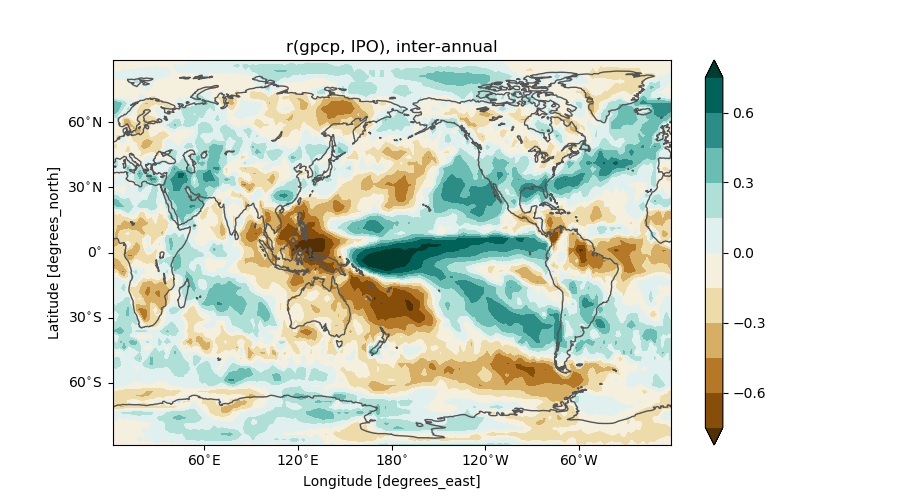

Text(0.5,1,'r(gpcp, IPO), inter-annual')

In [13]:
fig = plt.figure(figsize=(9,5))
m.coef_da.plot.contourf(robust=True, levels=10, cmap='BrBG')
mapplot()

plt.title('r(gpcp, IPO), inter-annual')

<IPython.core.display.Javascript object>


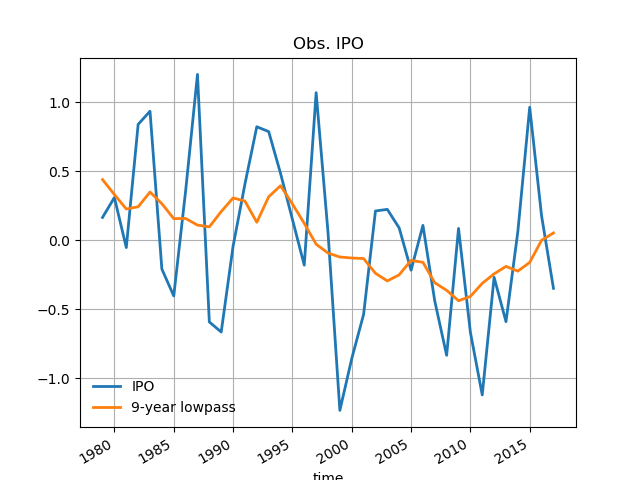

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Obs. IPO')

In [20]:
ts = ipo.resample(time='AS').mean('time').sel(time=slice('1979', '2017'))
ts.plot()
# ts.filter.lowpass(1./9).plot()
ts.rolling(time=9, center=True, min_periods=1).mean().plot(label='9-year lowpass')
plt.grid('on')

plt.legend()
plt.title('Obs. IPO')

In [15]:
ryears = 9
da = gpcp_annual.rolling(time=ryears, center=True, min_periods=1).mean()
ts = ipo_annual.rolling(time=ryears, center=True, min_periods=1).mean()
m = da.learn.regress(ts, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


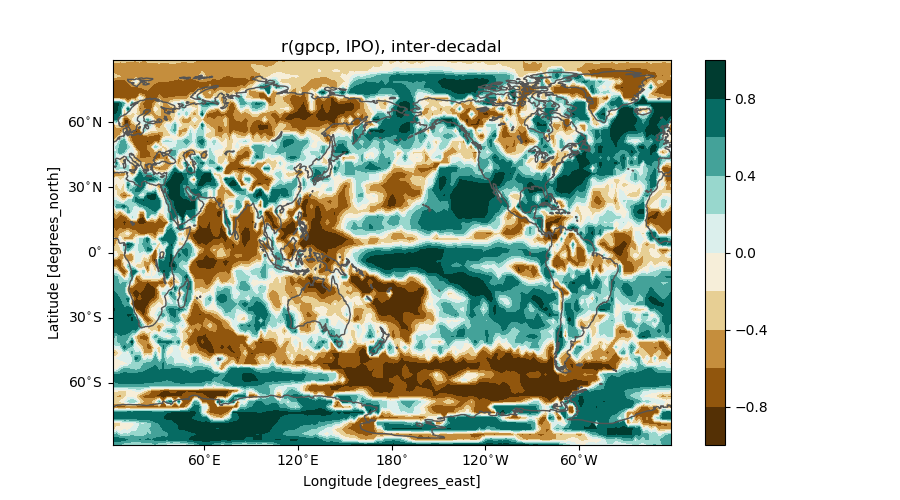

Text(0.5,1,'r(gpcp, IPO), inter-decadal')

In [16]:
plt.figure(figsize=(9,5))
m.coef_da.plot.contourf(robust=True, levels=10, cmap='BrBG')
mapplot()

plt.title('r(gpcp, IPO), inter-decadal')

In [250]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>